In [29]:
from sympy import *
import inspect
import numpy as np
from fractions import Fraction
init_printing()
%run -i symbol_func_spaces.py


In [132]:
s=Symbol("s")
p=Symbol("p")
n=Symbol("n")
q=Symbol("q")
f=Symbol("f")
g=Symbol("g")
alpha=Symbol("alpha")
r=Symbol("r")
k=Symbol("k")
l=Symbol("l")
j=Symbol("j")

In [85]:
nabla=Symbol("nabla")
lap=Symbol("triangle")

In [71]:
nabla

In [108]:
expr = "<"+k
expr[0]

TypeError: can only concatenate str (not "Symbol") to str

In [76]:
if expr.args[1]==Symbol("nabla"):
    print("yes")

yes


In [125]:
class Proj_f(Function):
    @classmethod
    def eval(cls, k, f):
       pass

    def _latex(self, printer):
        k, f = self.args
        _k, _f = printer._print(k), printer._print(f)
        
        if len(f.args)>1:
            if f.args[1]==Symbol("nabla"):
                return r'2^{%s} P_{%s}%s' % (_k,_k, f.args[0])
            if f.args[1]==Symbol("triangle"):
                l=printer._print(2*k)
                return r'2^{%s} P_{%s}%s' % (l,_k, f.args[0])
        else:
            return r'P_{%s}%s' % (_k, _f)

In [126]:
Proj_f(2,lap*f)

In [127]:
Proj_f(2,f)

In [137]:
class Paraproduct(Function):
    @classmethod
    def eval(cls,f,g):
       pass
    def _latex(self, printer):
         f,g = self.args
         _pf_h,_pg_h,_k = printer._print(Proj_f(k,f)), printer._print(Proj_f(k,g)), printer._print(k)
         _pf_l,_pg_l = printer._print(Proj_f(j,f)), printer._print(Proj_f(j,g))
         return r'\sum_{k} (%s  %s) + \sum_{k} \sum_{j<k-10} (%s %s) +  \sum_{k} \sum_{j<k-10} (%s %s)' %(_pf_h,_pg_h,_pf_l,_pg_h,_pg_l,_pf_h)


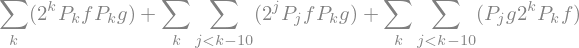

In [138]:
Paraproduct(nabla*f,g)